In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

train=pd.read_csv("train.csv")
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0    Male   27              1.0         46.0                   1   
1            1  Female   44              1.0         28.0                   0   
2            2    Male   52              1.0         46.0                   0   
3            3    Male   23              1.0         46.0                   1   
4            4  Female   43              1.0         28.0                   0   
...        ...     ...  ...              ...          ...                 ...   
304883  304883  Female   20              1.0          7.0                   0   
304884  304884  Female   24              1.0         20.0                   0   
304885  304885  Female   25              1.0         36.0                   1   
304886  304886    Male   22              1.0          8.0                   1   
304887  304887  Female   26              1.0         28.0                   1   

       Vehicle_Age Vehicle_

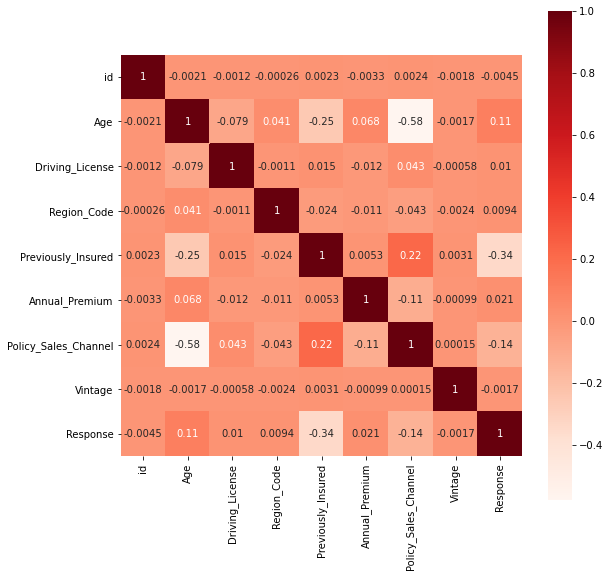

In [12]:
tu=train.corr()
plt.subplots(figsize=(9,9)) # 设置画面大小
sb.heatmap(tu, annot=True, vmax=1, square=True, cmap="Reds")
plt.show()